# **Problem Statement:**
In this Loan Status Prediction dataset, we have the data of applicants who previously applied for the loan based on the property which is a Property Loan.
The bank will decide whether to give a loan to the applicant based on some factors such as Applicant Income, Loan Amount, previous Credit History, Co-applicant Income, etc…

Our goal is to build a Machine Learning Model to predict the loan to be approved or to be rejected for an applicant.

# **Data Dictionary:**
Loan_ID: A unique loan ID.

Gender: Either male or female.

Married: Weather Married(yes) or Not Marttied(No).

Dependents: Number of persons depending on the client.

Education: Applicant Education(Graduate or Undergraduate).

Self_Employed: Self-employed (Yes/No).

ApplicantIncome: Applicant income.

CoapplicantIncome: Co-applicant income.

LoanAmount: Loan amount in thousands.

Loan_Amount_Term: Terms of the loan in months.

Credit_History: Credit history meets guidelines.

Property_Area: Applicants are living either Urban, Semi-Urban or Rural.

**Class(Target/Label):**

Loan_Status: Loan approved (Y/N).


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # importing seaborn for statistical plots
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
from sklearn import metrics # calculate accuracy measures and confusion matrix

**Load and review data**

In [ ]:
loan_data=pd.read_csv("loan_data.csv")

**Display First 5 Records**

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


**Display Last 5 Records**

In [ ]:
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


**Display number of rows & columns**

In [ ]:
loan_data.shape

(381, 13)

**To check null values**

In [ ]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


**To Treat Null values**

In [ ]:
loan_data.dropna(inplace=True)

**After Treat null values**

In [ ]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


**Display all datatypes**

In [ ]:
loan_data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


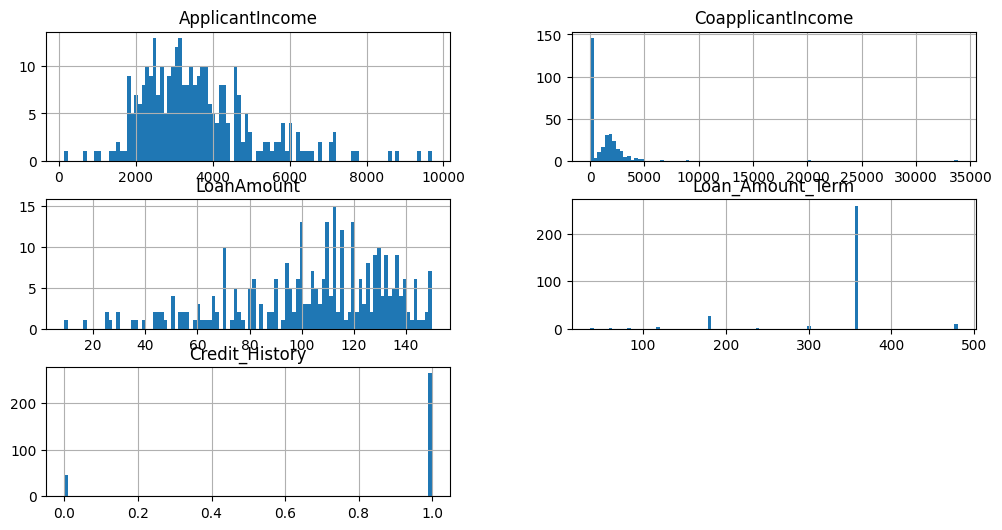

In [ ]:
col=list(loan_data)[0:-1] # Excluding Outcome column which has only
loan_data[col].hist(stacked=False,bins=100,figsize=(12,30),layout=(14,2));
# Histogram of first 13 columns

# **Identify Correlation in data**

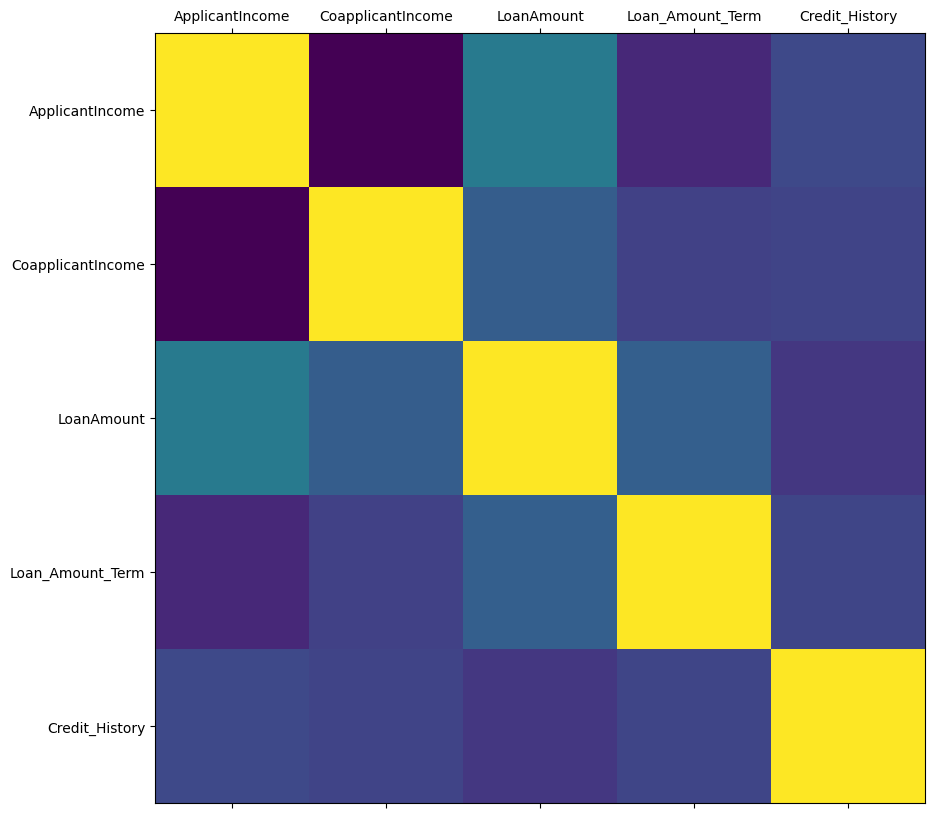

In [ ]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df,size=10):
  # Select only numerical columns for correlation
  corr=df.select_dtypes(include=np.number).corr()
  fig,ax=plt.subplots(figsize=(size,size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)),corr.columns)
  plt.yticks(range(len(corr.columns)),corr.columns)

# Call the function with the loan_data DataFrame
plot_corr(loan_data)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation. We can see none of variable have correlation with any other variables.

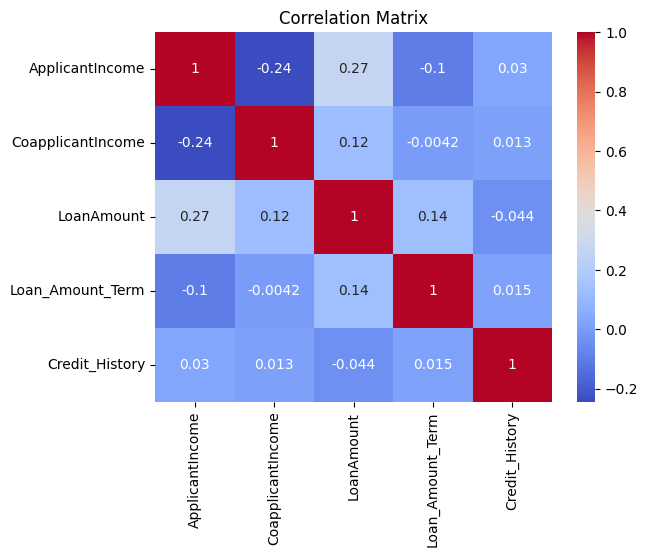

In [ ]:
# Select only numerical columns before calculating the correlation matrix
correlation_matrix = loan_data.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

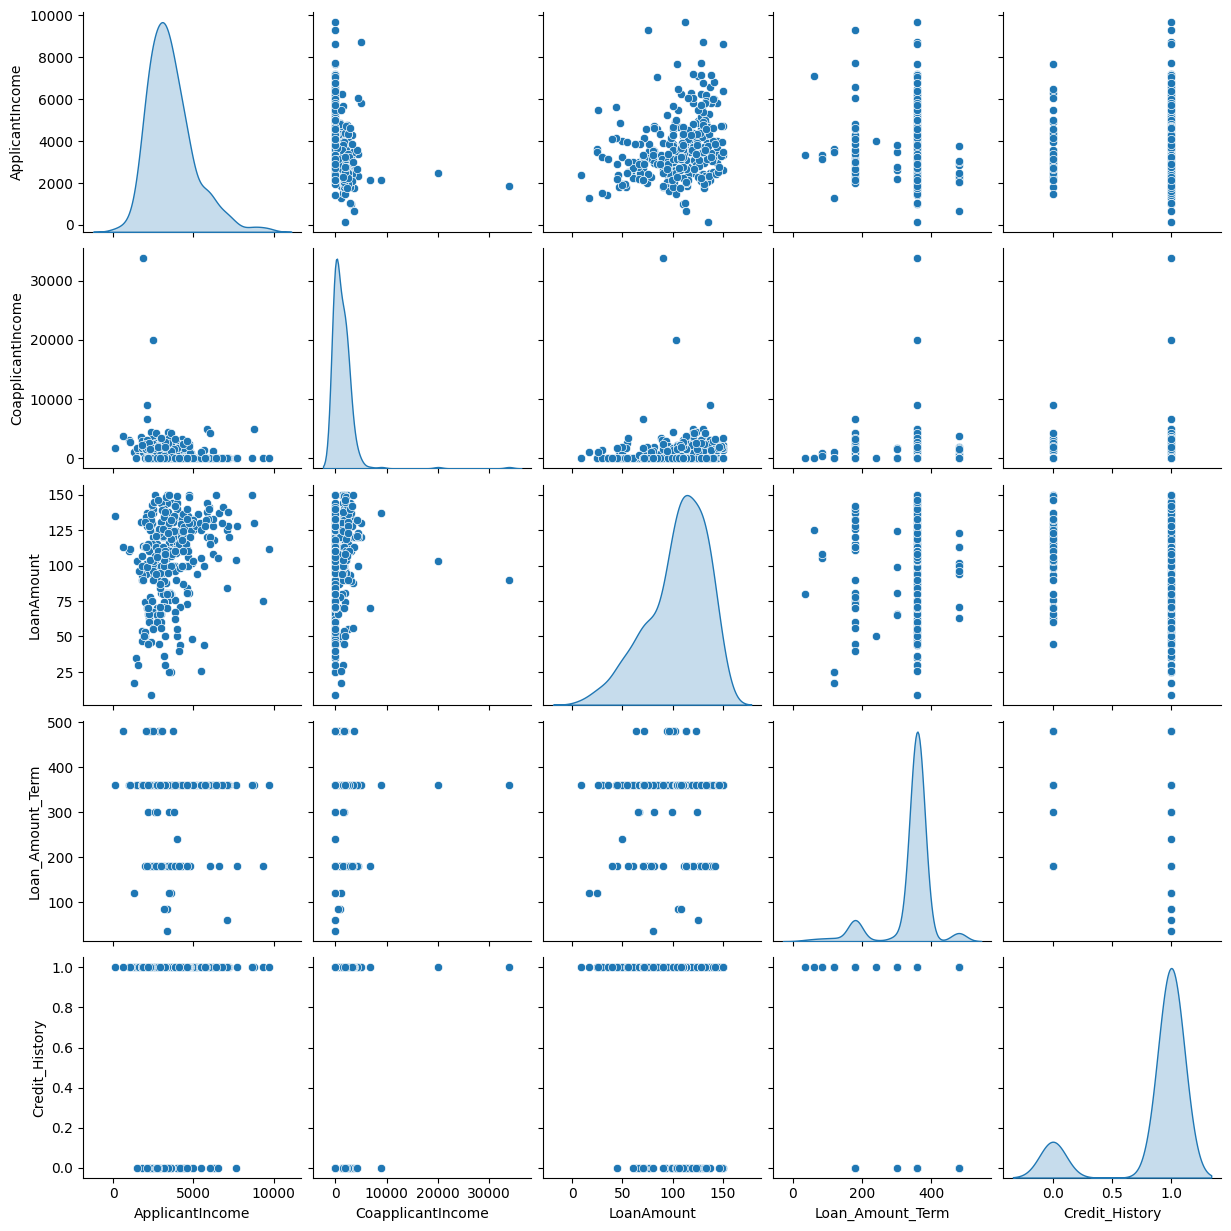

In [ ]:
sns.pairplot(loan_data,diag_kind='kde')

In [ ]:
#Frequency Tables (for categorical variables)
# Example for the 'Loan_Status' variable (assuming it's categorical):


loan_data["Loan_Status"].value_counts()

,count
Loan_Status,
Y,219
N,89


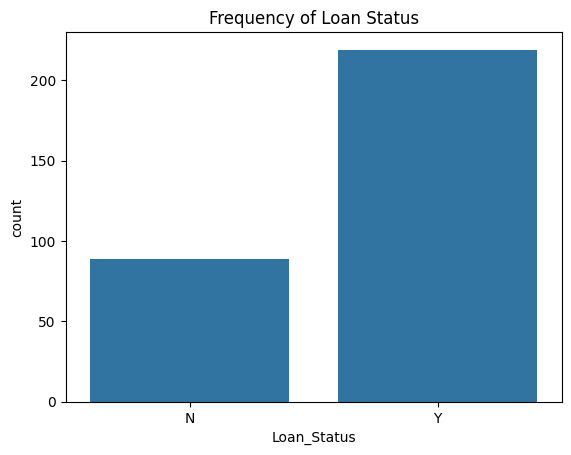

In [ ]:
#Bar Charts (for categorical variables):
plt.figure()
sns.countplot(x='Loan_Status',data=loan_data)
plt.title('Frequency of Loan Status')
plt.show()

**Spliting the data**

In [ ]:
x=loan_data.drop(['Loan_Status','Loan_ID'],axis=1)
y=loan_data['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
148,Male,Yes,2,Graduate,No,5819,5000.0,120.0,360.0,1.0,Rural
43,Male,Yes,0,Graduate,No,3366,2200.0,135.0,360.0,1.0,Rural
323,Male,Yes,2,Graduate,No,3283,2035.0,148.0,360.0,1.0,Urban
223,Male,Yes,1,Graduate,No,3875,0.0,67.0,360.0,1.0,Urban
240,Male,No,0,Graduate,Yes,7167,0.0,128.0,360.0,1.0,Urban


**Spliting the data**

In [ ]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(loan_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(loan_data.index)) * 100))

69.81% data is in training set
30.19% data is in test set


# **Data Preparation**

**Check hidden missing values**

As we checked missing values earlier but haven't got any. But there can be lots of entries with Y values. We must need to take care of those as well.

In [ ]:
x_train.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
148,Male,Yes,2,Graduate,No,5819,5000.0,120.0,360.0,1.0,Rural
43,Male,Yes,0,Graduate,No,3366,2200.0,135.0,360.0,1.0,Rural
323,Male,Yes,2,Graduate,No,3283,2035.0,148.0,360.0,1.0,Urban
223,Male,Yes,1,Graduate,No,3875,0.0,67.0,360.0,1.0,Urban
240,Male,No,0,Graduate,Yes,7167,0.0,128.0,360.0,1.0,Urban


# **Train Naive Bays algorithm**

In [ ]:
# Select numerical and categorical columns
numerical_cols = x_train.select_dtypes(include=np.number).columns
categorical_cols = x_train.select_dtypes(exclude=np.number).columns

# Apply one-hot encoding to categorical columns
x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

# Ensure that the test set has the same columns as the training set after encoding
# This handles cases where some categories might be missing in the test set
x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)

from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

diab_model = GaussianNB()

# Fit the model using the encoded data
diab_model.fit(x_train_encoded, y_train.ravel())

<ipython-input-36-cd18b7f35cce>:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  diab_model.fit(x_train_encoded, y_train.ravel())


GaussianNB()

**Performance of our model with training data**

In [ ]:
diab_train_predict=diab_model.predict(x_train_encoded)
from sklearn import metrics
print("model accuracy:{0:.4f}".format(metrics.accuracy_score(y_train,diab_train_predict)))
print()

model accuracy:0.8372



# **Performance of our model with testing data**

In [ ]:

diab_test_predict = diab_model.predict(x_test_encoded) # Use the encoded test set

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.8280



## **Last check the confusion matrix and classification report**

Confusion Matrix


<Axes: >

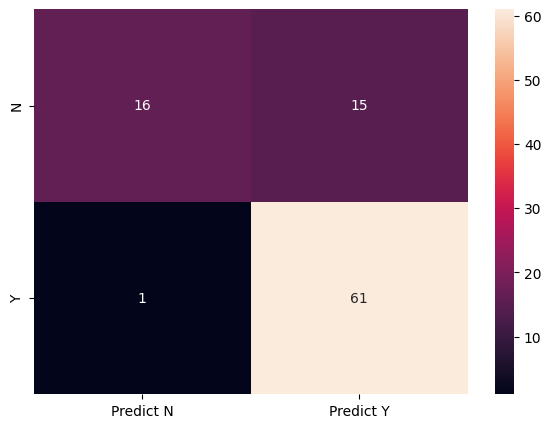

In [ ]:

print("Confusion Matrix")
# Get the unique sorted labels from the actual test data
actual_labels = sorted(y_test.unique())
# Use the actual labels for the confusion matrix
cm = metrics.confusion_matrix(y_test, diab_test_predict, labels=actual_labels)
# Update the dataframe index and columns to reflect the string labels
df_cm = pd.DataFrame(cm, index=[i for i in actual_labels],
                   columns=[f"Predict {i}" for i in actual_labels])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)


In [ ]:
print("classification Report")
# Use the string literals 'Y' and 'N' for the labels argument
print(metrics.classification_report(y_test,diab_test_predict,labels=['Y','N']))


classification Report
              precision    recall  f1-score   support

           Y       0.80      0.98      0.88        62
           N       0.94      0.52      0.67        31

    accuracy                           0.83        93
   macro avg       0.87      0.75      0.78        93
weighted avg       0.85      0.83      0.81        93



**We can see our true positive numbers with value Y is of precision and recall is below 90%**